#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [9]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [11]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [15]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [16]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

TypeError: unhashable type: 'numpy.ndarray'

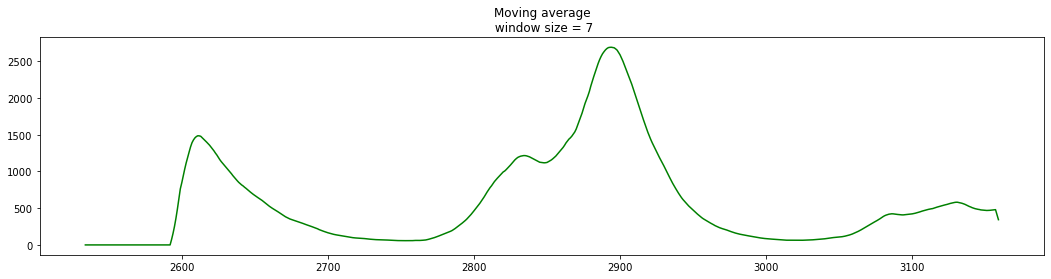

In [17]:
# Demonstrate the use of the function to plot moving averages
plot_moving_average(sample_ci, 7, plot_intervals=False, scale=1.96)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

The consultant created the earlier function to calculate a moving average. The moving average technique is used to smooth the seasonal effects and irregularities in the data. An upward trend in a moving average could signify an upswing in hospitalisations while a downward trend could be a sign of decline. Calculating the average eliminates some of the randomness in the data, leaving a smooth trend-cycle. 

The analyst may have created the code to return the top three days with the biggest difference between the daily value and the rolling 7-day mean in order to show irregularities that would have been missed in the moving average function. This information could be useful in interpreting the data since one of the down sides of using a moving average is that it can flatten the curve too much if the window is too broad. 

In [ ]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

### Question 3:

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data and how can this be used in predictions?

Qualitative data is based on groups, interepretation, and description. Examples include gender, binary data, ranking, and name. Quantitative data is numeric and portrayed by ordinal, interval or ration scales and lends itself to statistical manipulation. Examples include height, distance, temperature, and speed. 

Qualitative data can be used in forecasting techniques like the Delphi method, market research, and panel consensus. Qualitative methods are useful when you have insufficient historic data to make statistically relevant conclusions. these methods are useful in providing short-term predictions for companies, products, and services and can be triangulated with statistical methods to guide modelling.

Quantitative data can be used in a number of time series, causal, and correlational/observational forecasting techniques. These approaches are concerned only with numerical data that is easily quantifiable and is effective when there is accurate historical data available to predict the probability of future events. Quantitative methods involve learning patterns from data to help better understand how a process works or to predict future events. 

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement can lead to small but impactful changes that can help gather more reliable insights to inform business decision-making. These changes enable organisations to stay ahead of the competition and achieve objectives and, in turn, can help attract new customers and improve the experience of existing ones. 

#### Question 3.2 (double click cell to edit)
- We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)

Data ethics should not be ignored and apply to any data practices the business performs. For instance, aggregated data can still be misused or manipulated to reflect a biased point of view. Data ethics will help safeguard against fraud, misuse, unauthorised use, and phishing schemes.